# DEA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dfmolino=pd.read_csv('completosdos.csv', index_col=[0], parse_dates=True,low_memory=True)
dfmolino.index=dfmolino.index.tz_convert(None)
dfmolino.head(3)

,Alimentacion,PresionEntrada,PresionSalida,TempEntrada,TempSalida,PotMotorMol,PotenciaVentilador,TempSalidaTorreH1,PosicionDamperVentilador,TempSalidaSepar,...,PressDifCiclon,PotenVentMol,GapRollerLadolibre,GapRollerLadomotor,T_separador_V,Alimentacion_SP,Alimentacion_SP_Transmitido,Corriente_Roller1,Corriente_Roller2,Status
_time,,,,,,,,,,,,,,,,,,,,,
2025-04-30 05:00:00,136.784531,2.719311,26.642696,120.597450,117.117737,46.524136,67.249512,385.156982,43.862629,118.302818,...,6.469368,63.007191,20.315764,18.495640,130.069641,136.800003,136.800003,85.175575,94.902107,2.0
2025-04-30 05:00:15,136.818604,2.679649,26.511820,120.691658,116.961685,46.314564,67.092178,385.152374,43.858666,118.278412,...,6.744308,63.178700,19.488863,17.692875,130.150024,136.800003,136.800003,85.903587,93.413040,2.0
2025-04-30 05:00:30,136.987274,2.509817,27.246182,120.691658,116.729080,46.479092,67.058434,385.191895,43.858666,118.302498,...,6.976952,62.850044,19.697975,17.887428,130.163925,137.100006,137.100006,83.514122,93.754501,2.0


In [3]:
dfmolino.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166119 entries, 2025-04-30 05:00:00 to 2025-05-30 14:01:15
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Alimentacion                 166087 non-null  float64
 1   PresionEntrada               166086 non-null  float64
 2   PresionSalida                166086 non-null  float64
 3   TempEntrada                  166085 non-null  float64
 4   TempSalida                   166078 non-null  float64
 5   PotMotorMol                  166090 non-null  float64
 6   PotenciaVentilador           166044 non-null  float64
 7   TempSalidaTorreH1            166043 non-null  float64
 8   PosicionDamperVentilador     166091 non-null  float64
 9   TempSalidaSepar              166069 non-null  float64
 10  PressRoller1                 166069 non-null  float64
 11  PressRoller2                 166069 non-null  float64
 12  CorrienteElevador       

In [4]:
dfmolino.describe().T

,count,mean,std,min,25%,50%,75%,max
Alimentacion,166087.0,133.260949,51.106335,-6.769084,140.106758,154.711700,159.681534,180.055984
PresionEntrada,166086.0,1.718698,1.374370,-0.244667,1.008095,1.486451,2.114015,20.284563
PresionSalida,166086.0,28.250538,8.737231,-0.745668,28.774010,30.185709,31.569314,55.905018
TempEntrada,166085.0,110.046217,16.570276,27.885086,105.875587,110.468811,116.545990,201.390976
TempSalida,166078.0,103.381217,18.038611,26.805054,101.918900,106.665230,111.508713,154.493591
PotMotorMol,166090.0,40.617465,13.887581,-0.045648,43.952732,45.069237,46.181230,49.303844
PotenciaVentilador,166044.0,69.122167,8.384278,0.000000,67.969347,71.501388,72.664999,103.736000
TempSalidaTorreH1,166043.0,386.452197,12.952346,307.264587,381.666871,385.872620,390.356308,3194.889400
PosicionDamperVentilador,166091.0,50.264735,10.810263,0.000000,48.154839,51.098915,53.941879,99.455116
TempSalidaSepar,166069.0,105.417751,18.172244,30.848614,104.062477,108.746567,113.660408,159.062836


In [5]:
dfmolino[dfmolino.index.to_period('D')>='2025-04-16'].shape[0]/dfmolino.shape[0]

1.0

In [4]:
cond_fun=((dfmolino.Alimentacion>40) & (dfmolino.PotMotorMol>38))

<Axes: xlabel='Alimentacion', ylabel='PotMotorMol'>

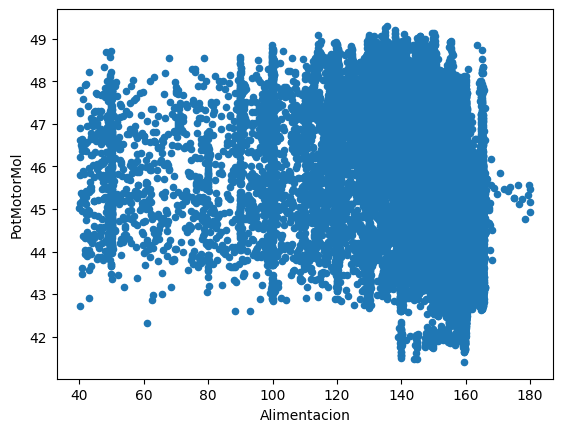

In [7]:
dfmolino.loc[cond_fun,['Alimentacion','PotMotorMol']].plot(kind='scatter', 
                                                           x='Alimentacion',
                                                           y='PotMotorMol')

In [29]:
dfinfo=dfmolino.loc[cond_fun,['Alimentacion','PotMotorMol','CorrienteElevador','Corriente_Roller1']].copy()

In [9]:
#dfinfo['Alimentacion_kg_s']=dfinfo['Alimentacion']*(1000/60)

In [10]:
#dfinfo['Potencia_mot']=dfinfo['PotMotorMol']*24.6

In [23]:
def pot_al(x):
    return 0.2*np.log(1-(1/169)*x)+49

In [16]:
al_=np.linspace(40,165, 150)

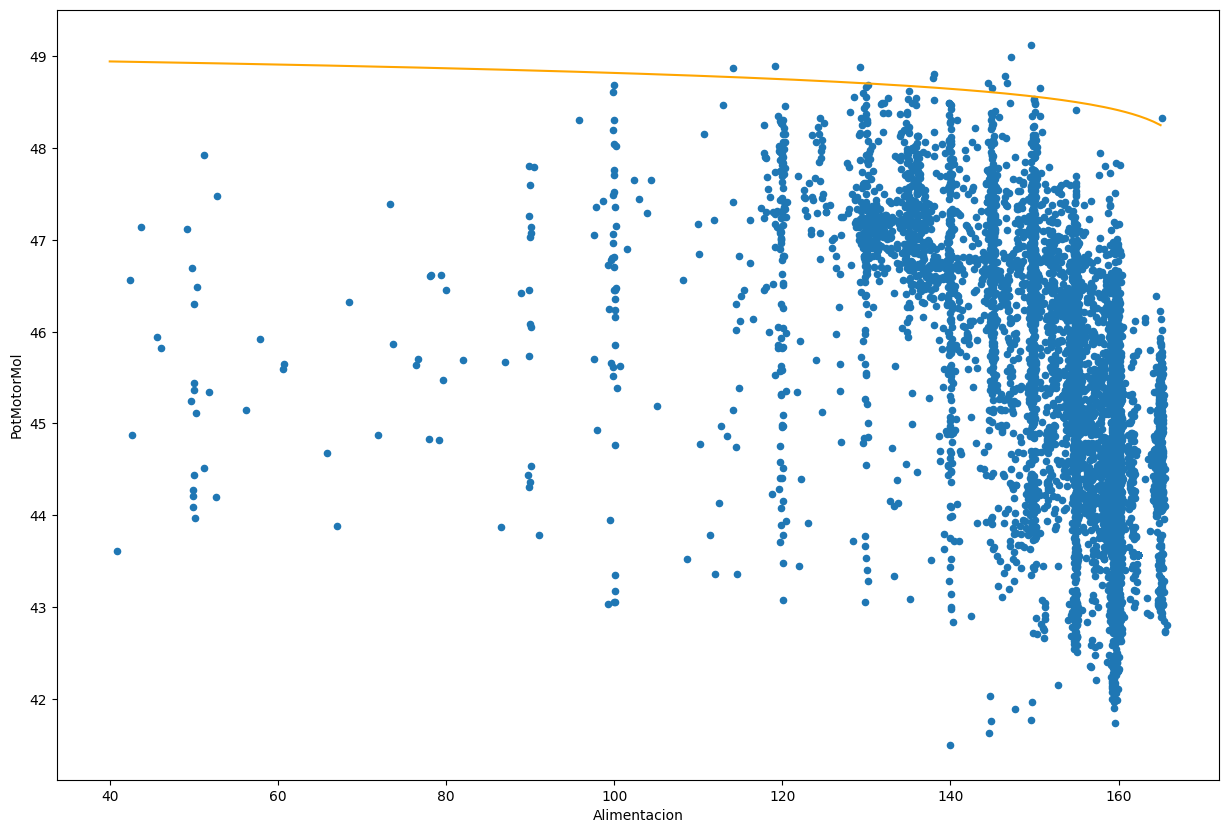

In [30]:
dfinfo.sample(frac=0.05).plot(kind='scatter', 
                            x='Alimentacion',
                            y='PotMotorMol',
                            figsize=(15,10))
plt.plot(al_,pot_al(al_), color='orange')

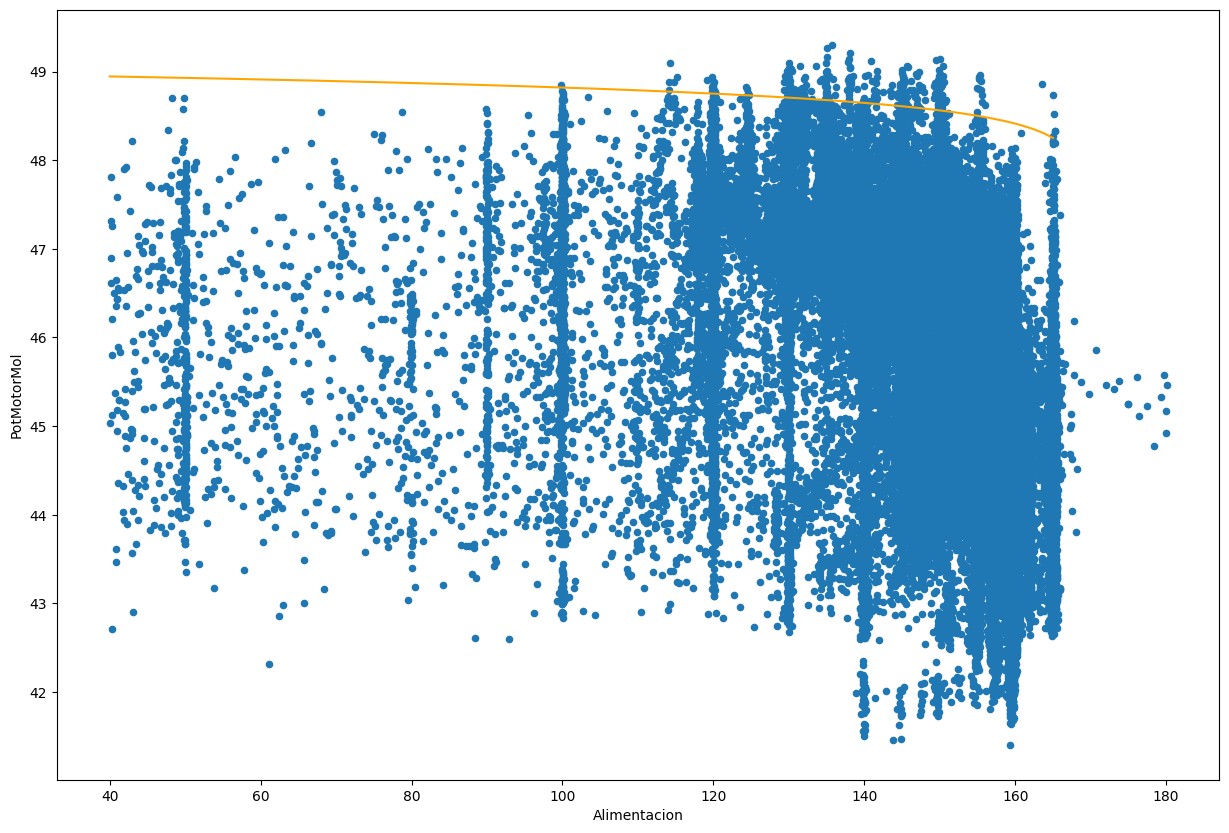

In [25]:
dfinfo.plot(kind='scatter', 
                            x='Alimentacion',
                            y='PotMotorMol',
                            figsize=(15,10))
plt.plot(al_,pot_al(al_), color='orange')

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [233]:
dfinfo.columns

Index(['Alimentacion', 'PotMotorMol', 'CorrienteElevador',
       'Corriente_Roller1'],
      dtype='object')

In [117]:
escalado = StandardScaler().fit(dfinfo.dropna())
dfes= escalado.transform(dfinfo.dropna(), copy=True)

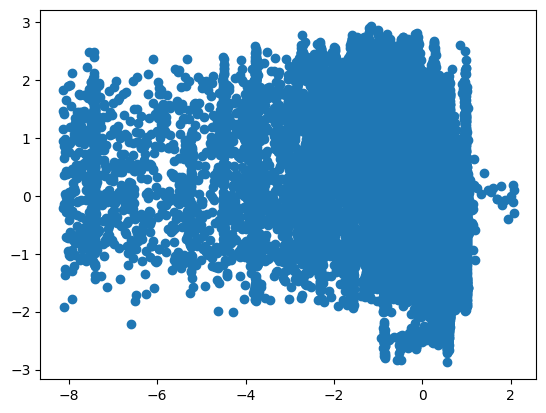

In [118]:
plt.scatter(dfes[:,0],dfes[:,1])

In [154]:
outliers = IsolationForest(n_estimators=150,
                           max_samples=15,
                           contamination=0.10).fit(dfes)

In [155]:
out=outliers.predict(dfes)

C:\Users\ccollazos\AppData\Local\Temp\ipykernel_9312\1177677228.py:2: RuntimeWarning: invalid value encountered in log
  return 0.4*np.log(1.5-(1/105)*x)+47


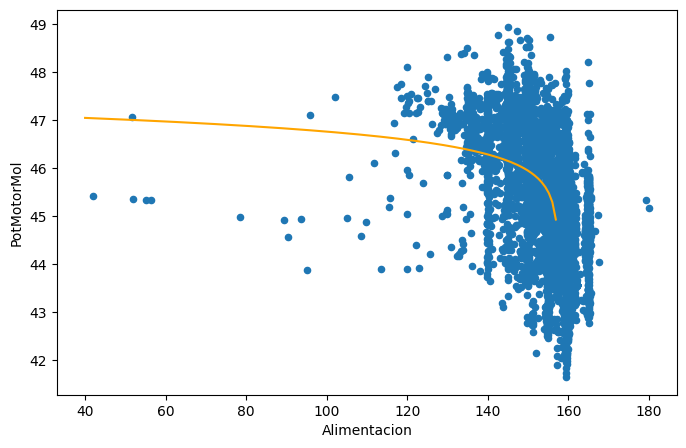

In [173]:
dfinfo.dropna().iloc[out>=0].sample(frac=0.05).plot(kind='scatter', 
                            x='Alimentacion',
                            y='PotMotorMol',
                            figsize=(8,5))
plt.plot(al_,pot_al(al_), color='orange')

In [31]:
dfinfo['CEE']=(dfinfo['PotMotorMol']*21.6)/dfinfo['Alimentacion']

<Axes: xlabel='_time'>

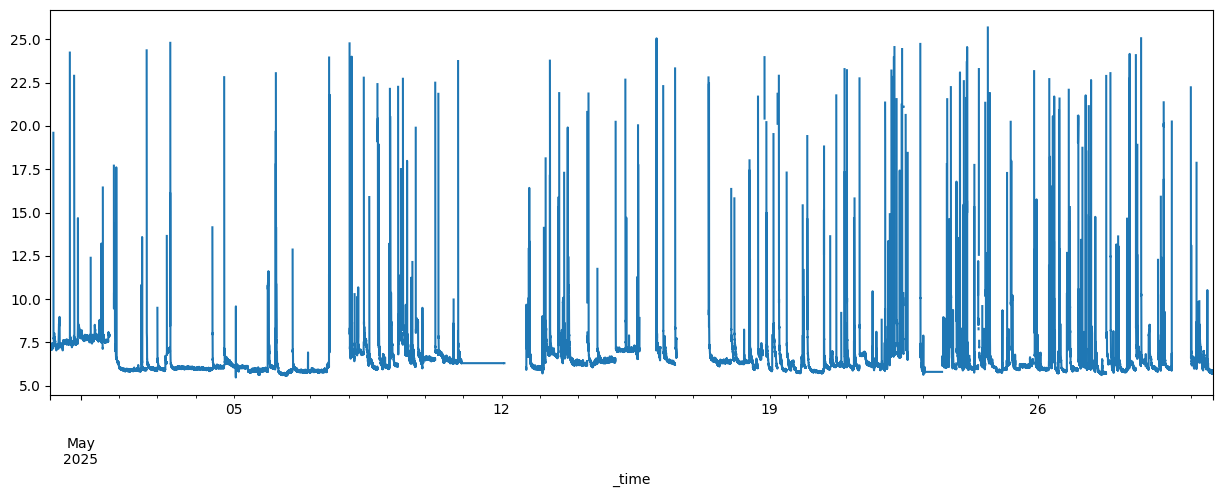

In [60]:
((dfinfo['PotMotorMol']*21.6)/dfinfo['Alimentacion']).resample("min").first().plot(figsize=(15,5))

<Axes: xlabel='_time'>

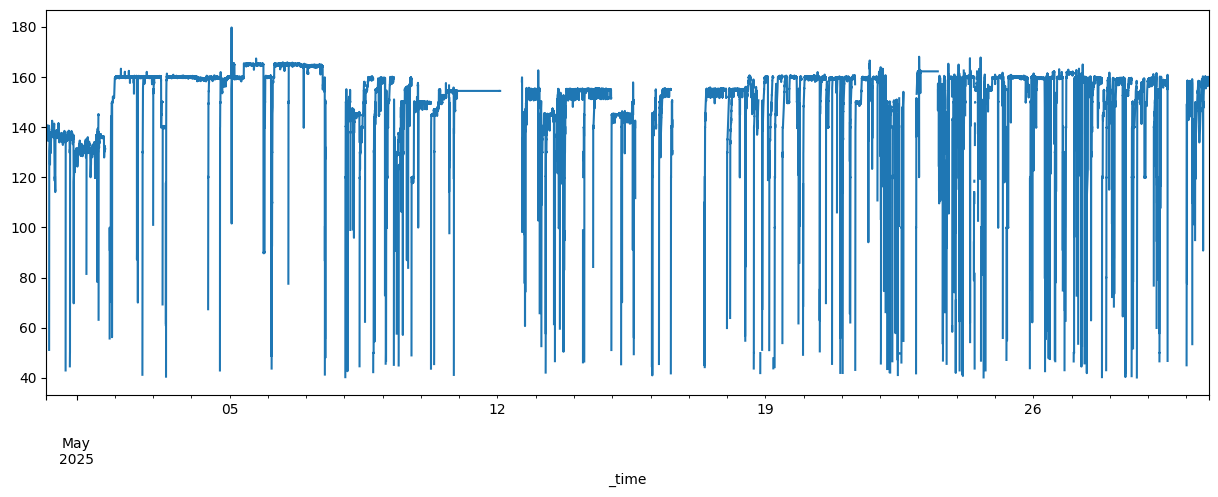

In [11]:
dfinfo['Alimentacion'].resample("min").first().plot(figsize=(15,5))

<Axes: >

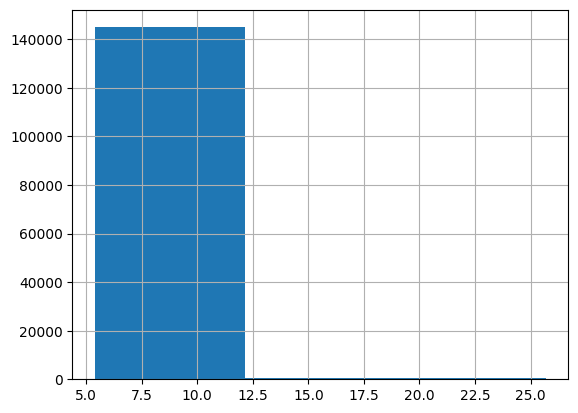

In [213]:
dfinfo['CEE'].hist(bins=3)

<Axes: xlabel='Alimentacion', ylabel='CEE'>

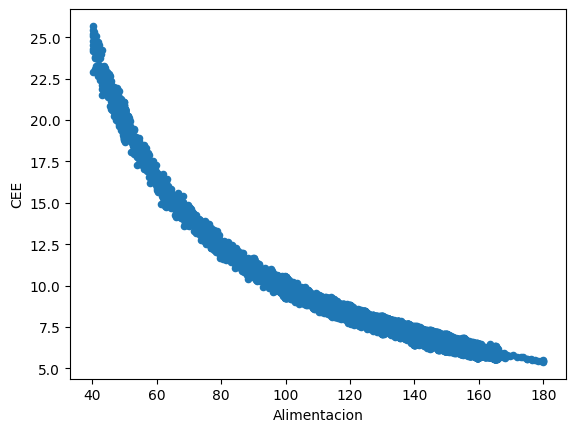

In [214]:
dfinfo.plot(kind='scatter',
            x='Alimentacion',
            y='CEE')

<Axes: xlabel='Alimentacion', ylabel='dummy'>

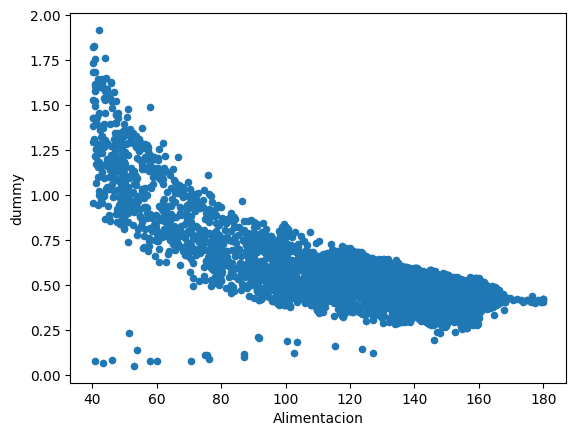

In [35]:
dfinfo.plot(kind='scatter',
            x='Alimentacion',
            y='dummy')

#.dropna().iloc[out>=0].sample(frac=0.7).sample(frac=0.05)

<Axes: xlabel='CEE', ylabel='dummy'>

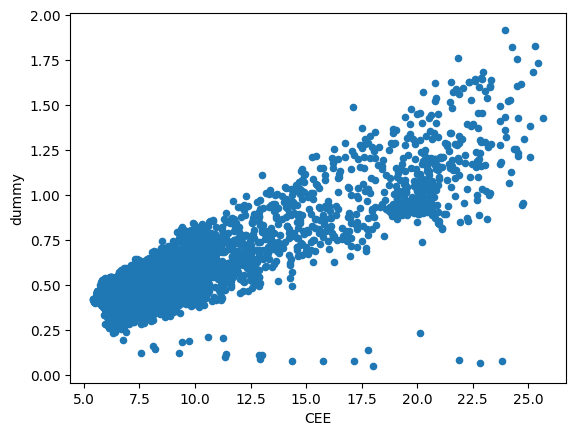

In [38]:
dfinfo.plot(kind='scatter',
            x='CEE',
            y='dummy')

<Axes: xlabel='Corriente_Roller1', ylabel='Alimentacion'>

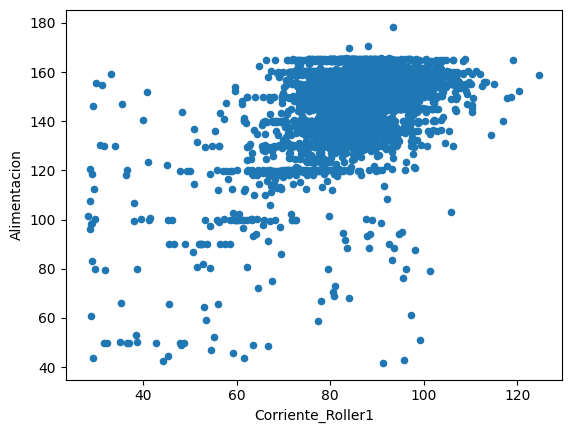

In [247]:
dfinfo.sample(frac=0.05).plot(kind='scatter',
            x='Corriente_Roller1',
            y='Alimentacion')


# TODAS LAS VARIABLES 

In [15]:
import seaborn as sns

In [5]:
dfmolino_fun=dfmolino.interpolate(method='linear').loc[cond_fun].dropna().copy()

In [15]:
dfmolino_fun['CorrienteElevador_01']=dfmolino_fun[['CorrienteElevador']].shift(1)

In [8]:
dfmolino_fun['Alimentacion'].describe()

count    145772.000000
mean        151.715935
std          13.725990
min          40.057713
25%         149.322052
50%         155.061599
75%         159.791458
max         180.055984
Name: Alimentacion, dtype: float64

<Axes: xlabel='_time'>

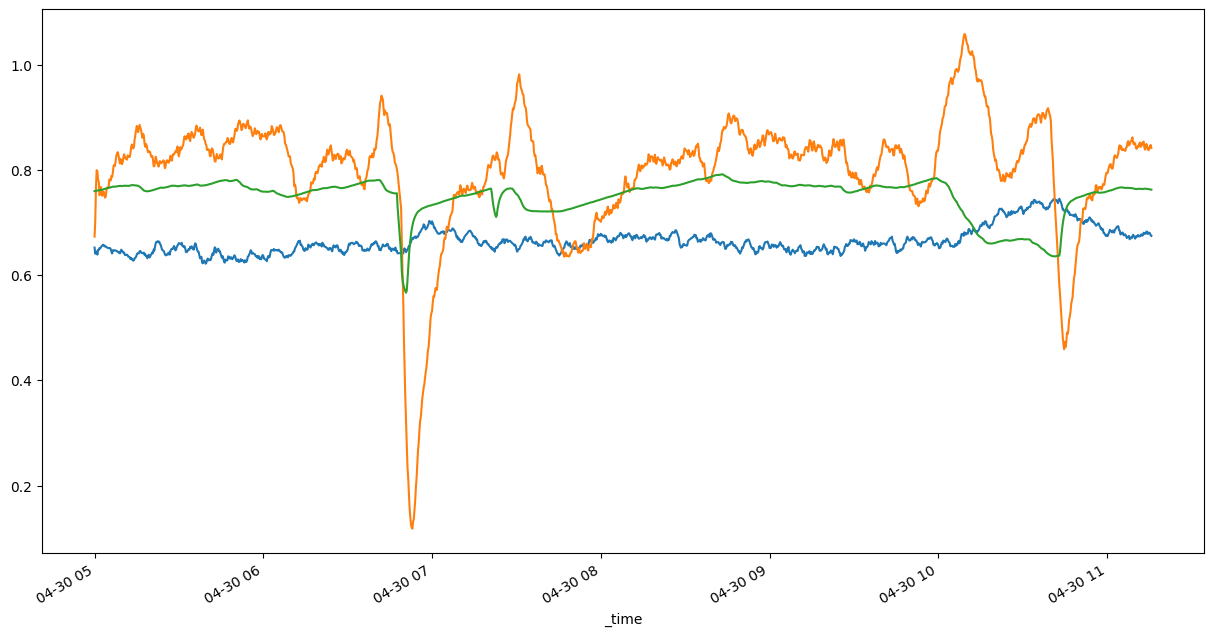

In [12]:
plt.figure(figsize=(15,8))
((dfmolino_fun.iloc[0:1500]['PotMotorMol'].ewm(alpha=0.2).mean()-40)/(50-40)).plot()
((dfmolino_fun.iloc[0:1500]['CorrienteElevador'].ewm(alpha=0.1).mean()-60)/(80-60)).plot()
(dfmolino_fun.iloc[0:1500]['Alimentacion'].ewm(alpha=0.2).mean()/180).plot()

<Axes: xlabel='_time'>

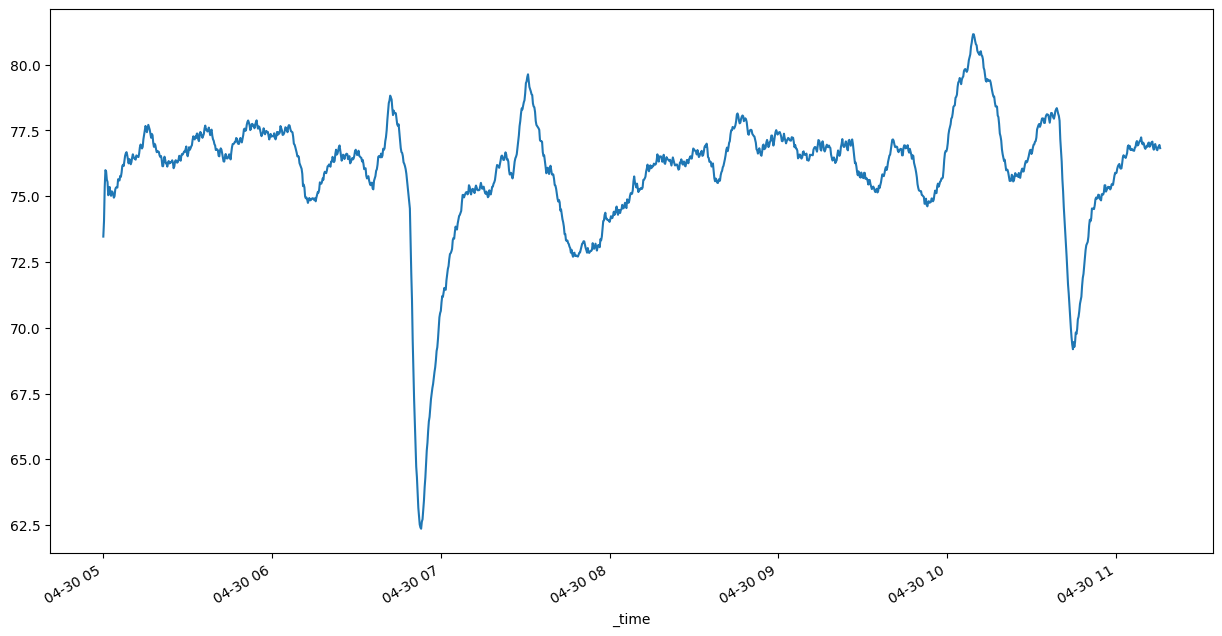

In [45]:
plt.figure(figsize=(15,8))
dfmolino_fun.iloc[0:1500]['CorrienteElevador'].ewm(alpha=0.1).mean().plot()

<Axes: xlabel='_time'>

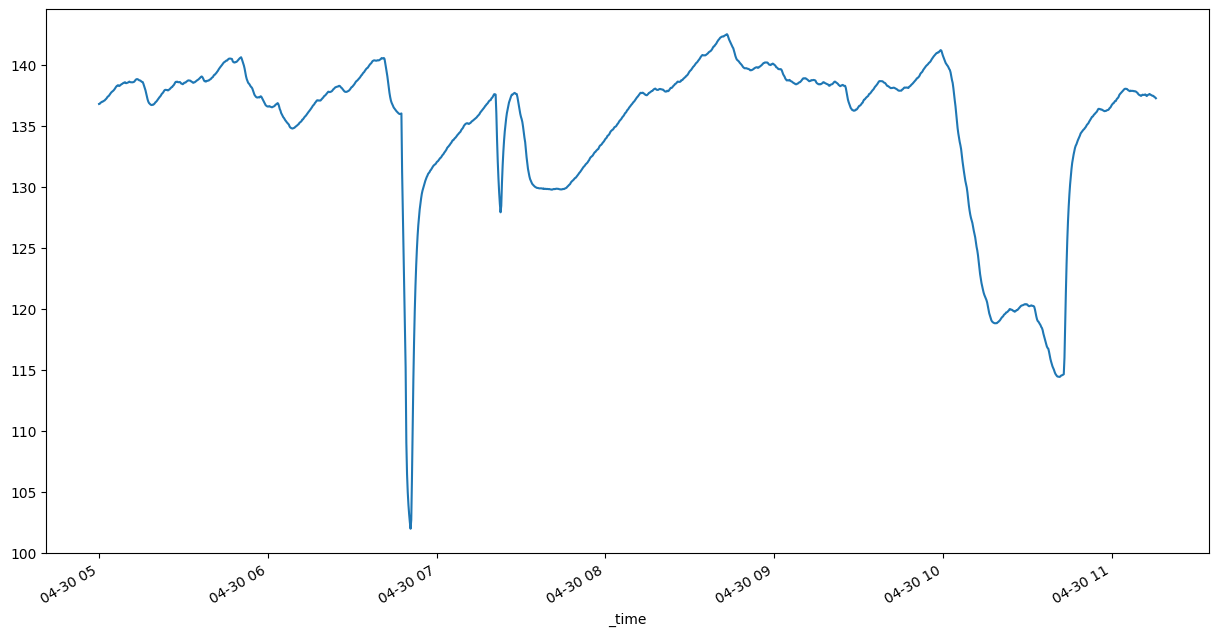

In [43]:
dfmolino_fun.iloc[0:1500]['Alimentacion'].ewm(alpha=0.2).mean().plot(figsize=(15,8))

In [17]:
dfmolino_fun=dfmolino_fun.ewm(alpha=0.2).mean()

<Axes: >

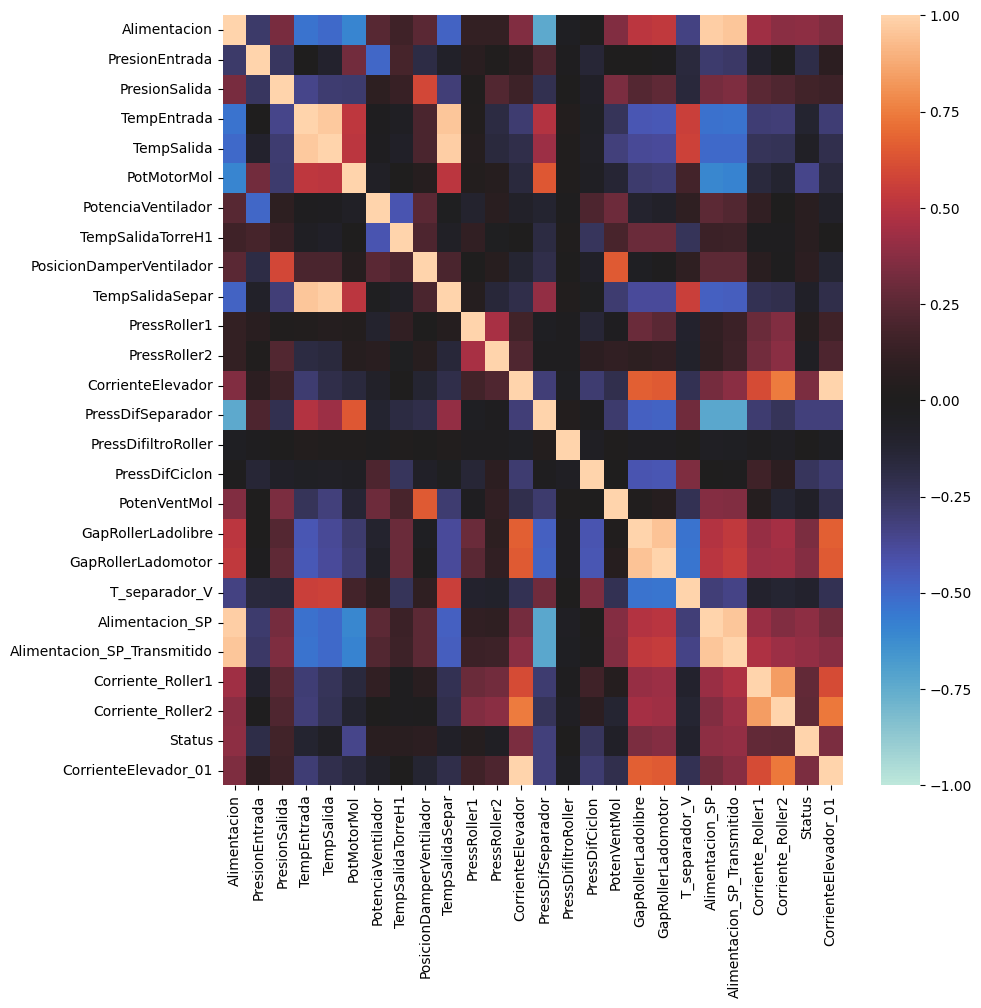

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(dfmolino_fun.corr(), vmin=-1.0, vmax=1.0,center=0.0)

In [35]:
dfmolino.columns

Index(['Alimentacion', 'PresionEntrada', 'PresionSalida', 'TempEntrada',
       'TempSalida', 'PotMotorMol', 'PotenciaVentilador', 'TempSalidaTorreH1',
       'PosicionDamperVentilador', 'TempSalidaSepar', 'PressRoller1',
       'PressRoller2', 'CorrienteElevador', 'PressDifSeparador',
       'PressDifiltroRoller', 'PressDifCiclon', 'PotenVentMol',
       'GapRollerLadolibre', 'GapRollerLadomotor', 'T_separador_V',
       'Alimentacion_SP', 'Alimentacion_SP_Transmitido', 'Corriente_Roller1',
       'Corriente_Roller2', 'Status'],
      dtype='object')

## Modelo 01

In [19]:
colum_X=[ 'GapRollerLadolibre', 'GapRollerLadomotor','Corriente_Roller1','Corriente_Roller2','CorrienteElevador']
colum_y=['CorrienteElevador_01']

In [ ]:
#dfmolino_fun=dfmolino_fun.rolling(4).mean()

In [20]:
dfmolino_fun[colum_X].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145772 entries, 2025-04-30 05:00:00 to 2025-05-30 14:01:15
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   GapRollerLadolibre  145772 non-null  float64
 1   GapRollerLadomotor  145772 non-null  float64
 2   Corriente_Roller1   145772 non-null  float64
 3   Corriente_Roller2   145772 non-null  float64
 4   CorrienteElevador   145772 non-null  float64
dtypes: float64(5)
memory usage: 6.7 MB


In [45]:
dfmolino_fun.iloc[0]['Alimentacion']

np.float64(136.09494)

In [21]:
X_ej=dfmolino_fun[colum_X].iloc[1:].values
y_ej=dfmolino_fun[colum_y].iloc[1:].values

In [22]:
train_size=round(X_ej.shape[0]*0.8)

In [23]:
Xej_train=X_ej[0:train_size]
Xej_test=X_ej[train_size:]
yej_train=y_ej[0:train_size]
yej_test=y_ej[train_size:]

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [54]:
pipe_02=Pipeline([('Escalado',StandardScaler()),('RF',RandomForestRegressor())])

In [55]:
pipe_02.fit(Xej_train,yej_train.ravel()).score(Xej_test,yej_test.ravel())

0.9809558941281048

In [56]:
predicted_pipe_02=pipe_02.predict(Xej_test)

In [29]:
mean_squared_error(yej_test.ravel(), predicted_pipe_02)

NameError: name 'predicted_pipe_02' is not defined

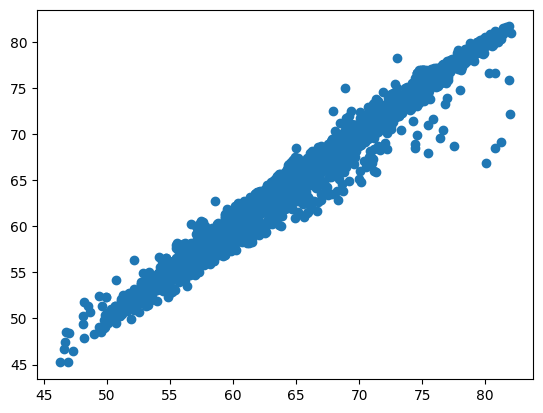

In [57]:
plt.scatter(yej_test.ravel(),predicted_pipe_02.ravel())

In [25]:
pipe_01=Pipeline([('Escalado',StandardScaler()),('RF',LinearRegression())])

In [26]:
pipe_01.fit(Xej_train,yej_train.ravel()).score(Xej_test,yej_test.ravel())

0.9889717803916346

In [27]:
predicted_pipe_01=pipe_01.predict(Xej_test)

In [30]:
mean_squared_error(yej_test.ravel(), predicted_pipe_01)

np.float64(0.20320830778826046)

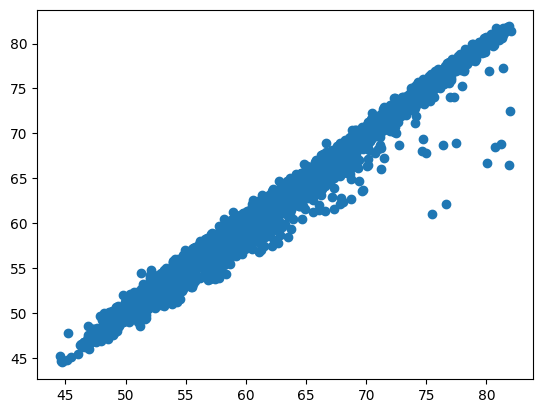

In [33]:
plt.scatter(yej_test.ravel(),predicted_pipe_01)

In [34]:
import pickle

In [35]:
Xej_train[5]

array([19.74442439, 18.1269002 , 85.75801075, 93.10295999, 75.52744327])

In [36]:
filename = 'model.pkl'
pickle.dump(pipe_01, open(filename, 'wb'))

In [ ]:
dfvob=pd.read_csv('Alimentacion_Crudo_Niveles_Optimos_CRC1.csv', index_col=["_time"], parse_dates=True)

In [ ]:
import mlflow.sklearn

In [ ]:
with mlflow.start_run() as run:
    mlflow.sklearn.log_model(pipe_02, "model_crc_alimentacion_molino")


2025/05/02 08:42:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


## Simulacion

In [ ]:
import time

In [ ]:
import Digital_model_Molino as dm

In [ ]:
tiempos=[]
for i in range(300,400):
    t0=time.time()
    dm.main_digital_model(pipe_02,dfmolino_fun.iloc[train_size+i],dfvob, 1)
    tiempos.append(time.time()-t0)

In [ ]:
sum(tiempos)

0.6401972770690918

# Modelo -- Argos

In [ ]:
dfargosmol=pd.read_csv('Datos_Entrenamiento_modelo_molino.csv', index_col=[0], parse_dates=True, low_memory=True)

In [ ]:
dfargosmol.info()

In [ ]:
dfargosmol=dfargosmol.dropna()

In [ ]:
dfargosmol.corr()

In [ ]:
dfargosmol.columns

In [ ]:
ymol=dfargosmol['CorrienteElevador'].values
Xmol=dfargosmol.iloc[:,1:].values

In [ ]:
train_shape=round(Xmol.shape[0]*0.8)

In [ ]:
Xmtrain=Xmol[0:train_shape]
Xmtest=Xmol[train_shape:]
ymtrain=ymol[0:train_shape]
ytest=ymol[train_shape:]

In [ ]:
modelo_argos=RandomForestRegressor().fit(Xmtrain,ymtrain)

In [ ]:
modelo_argos.score(Xmtest,ytest)